1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

## Load Dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [10]:
PATH = "HomeWork-churn_rate_prediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [4]:
target = 'churn_risk_score'

## Data Analysis

In [5]:
df.select_dtypes(include=[np.number]).head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.75,2
1,32,16,306.34,12838.38,NaN,1
2,44,14,516.16,21027.00,500.69,5
3,37,11,53.27,25239.56,567.66,5
4,31,20,113.13,24483.66,663.06,5


In [20]:
df.describe(include=[np.number])

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


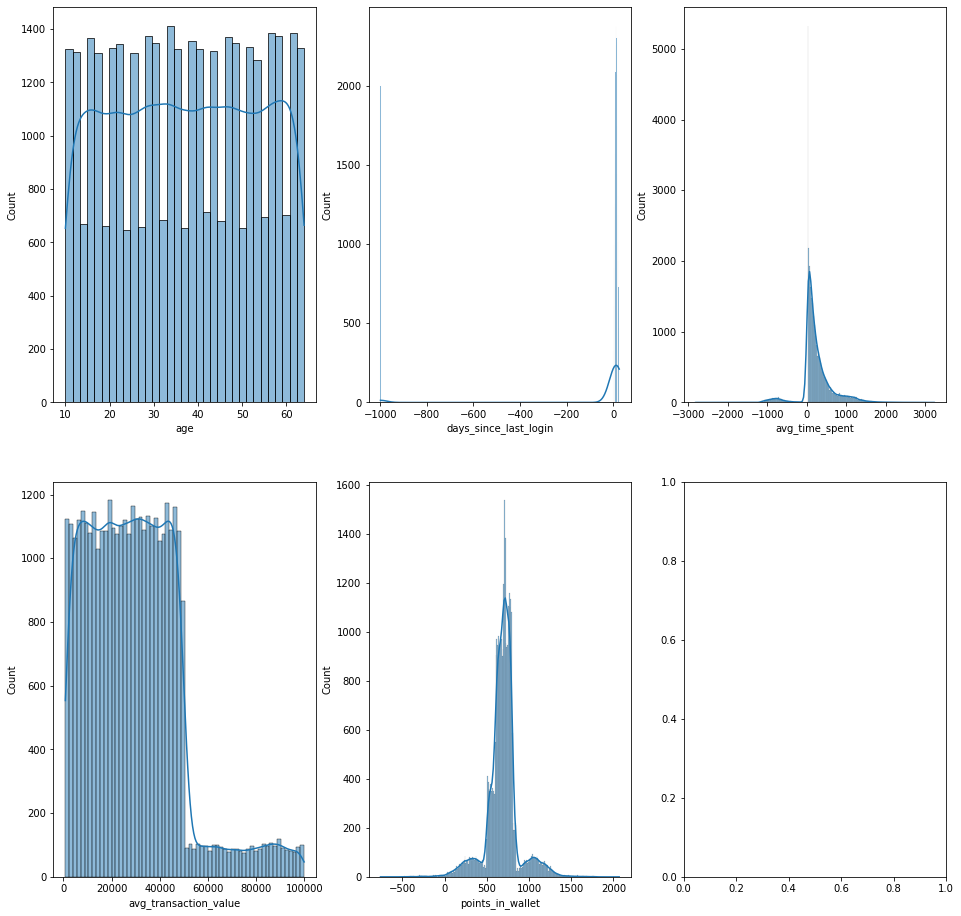

In [12]:
fig, axs = plt.subplots(2, 3, figsize=(16, 16))
sns.histplot(data=df, x="age", kde=True, ax=axs[0, 0])
sns.histplot(data=df, x="days_since_last_login", kde=True, ax=axs[0, 1])
sns.histplot(data=df, x="avg_time_spent", kde=True, ax=axs[0, 2])
sns.histplot(data=df, x="avg_transaction_value", kde=True, ax=axs[1, 0])
sns.histplot(data=df, x="points_in_wallet", kde=True, ax=axs[1, 1])

plt.show()

Ở các cột 'days_since_last_login' và 'avg_time_spend' và 'points_in_wallet' có các giá trị min là âm, ta phải để tâm và xử lý các giá trị này (outliers)

In [6]:
df.select_dtypes(include=['object']).head()

,customer_id,Name,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe4300490044003600300030003800,Pattie Morrisey,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,Yes,Yes,No,Not Applicable,Products always in Stock
1,fffe43004900440032003100300035003700,Traci Peery,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10.0,Yes,No,Yes,Solved,Quality Customer Care
2,fffe4300490044003100390032003600,Merideth Mcmeen,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website
3,fffe43004900440036003000330031003600,Eufemia Cardwell,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,6.0,No,Yes,Yes,Unsolved,Poor Website
4,fffe43004900440031003900350030003600,Meghan Kosak,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,16.0,No,Yes,Yes,Solved,Poor Website


In [7]:
df.describe(include='object').T

,count,unique,top,freq
customer_id,36992,36992,fffe4300490044003600300030003800,1
Name,36992,36992,Pattie Morrisey,1
gender,36992,3,F,18490
security_no,36992,36992,XW0DQ7H,1
region_category,31564,3,Town,14128
membership_category,36992,6,Basic Membership,7724
joining_date,36992,1096,2015-06-02,55
joined_through_referral,36992,3,No,15839
referral_id,36992,11359,xxxxxxxx,17846
preferred_offer_types,36704,3,Gift Vouchers/Coupons,12349


Ở các cột 'gender', 'joined_through_referral', 'referral_id', 'avg_frequency_login_days' có chứa các giá trị khá đặc biệt và ta cần lưu tâm để xử lý các cột này

Ở các cột 'customer_id', 'Name', 'security_no', 'referral_id', 'last_visit_time' có quá nhiều giá trị unique nên chúng ta cần loại bỏ các cột này. Đồng thời sẽ chuyển cột 'avg_frequency_login_days' về dạng numeric

C:\Users\mikej\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


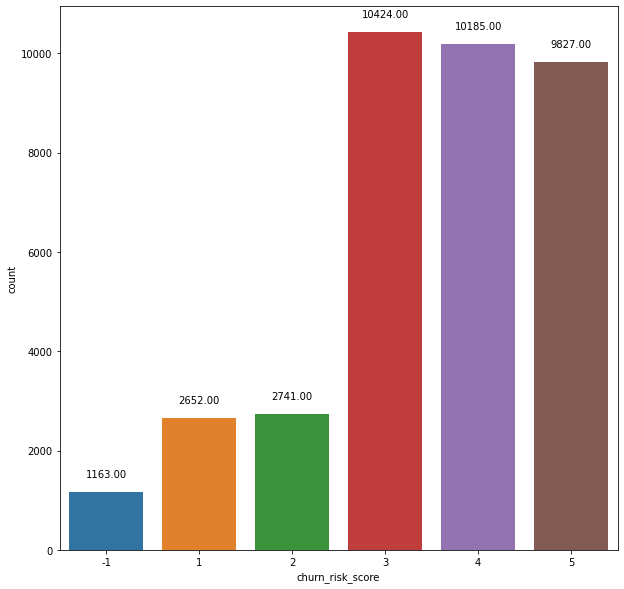

In [11]:
plt.rcParams['figure.figsize'] = [10,10] 
ax = sns.countplot(df[target])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.show()

Chúng ta có tới 6 giá trị cho cột 'churn_risk_score' từ -1 đến 5. -1 là outlier cần phải xử lý

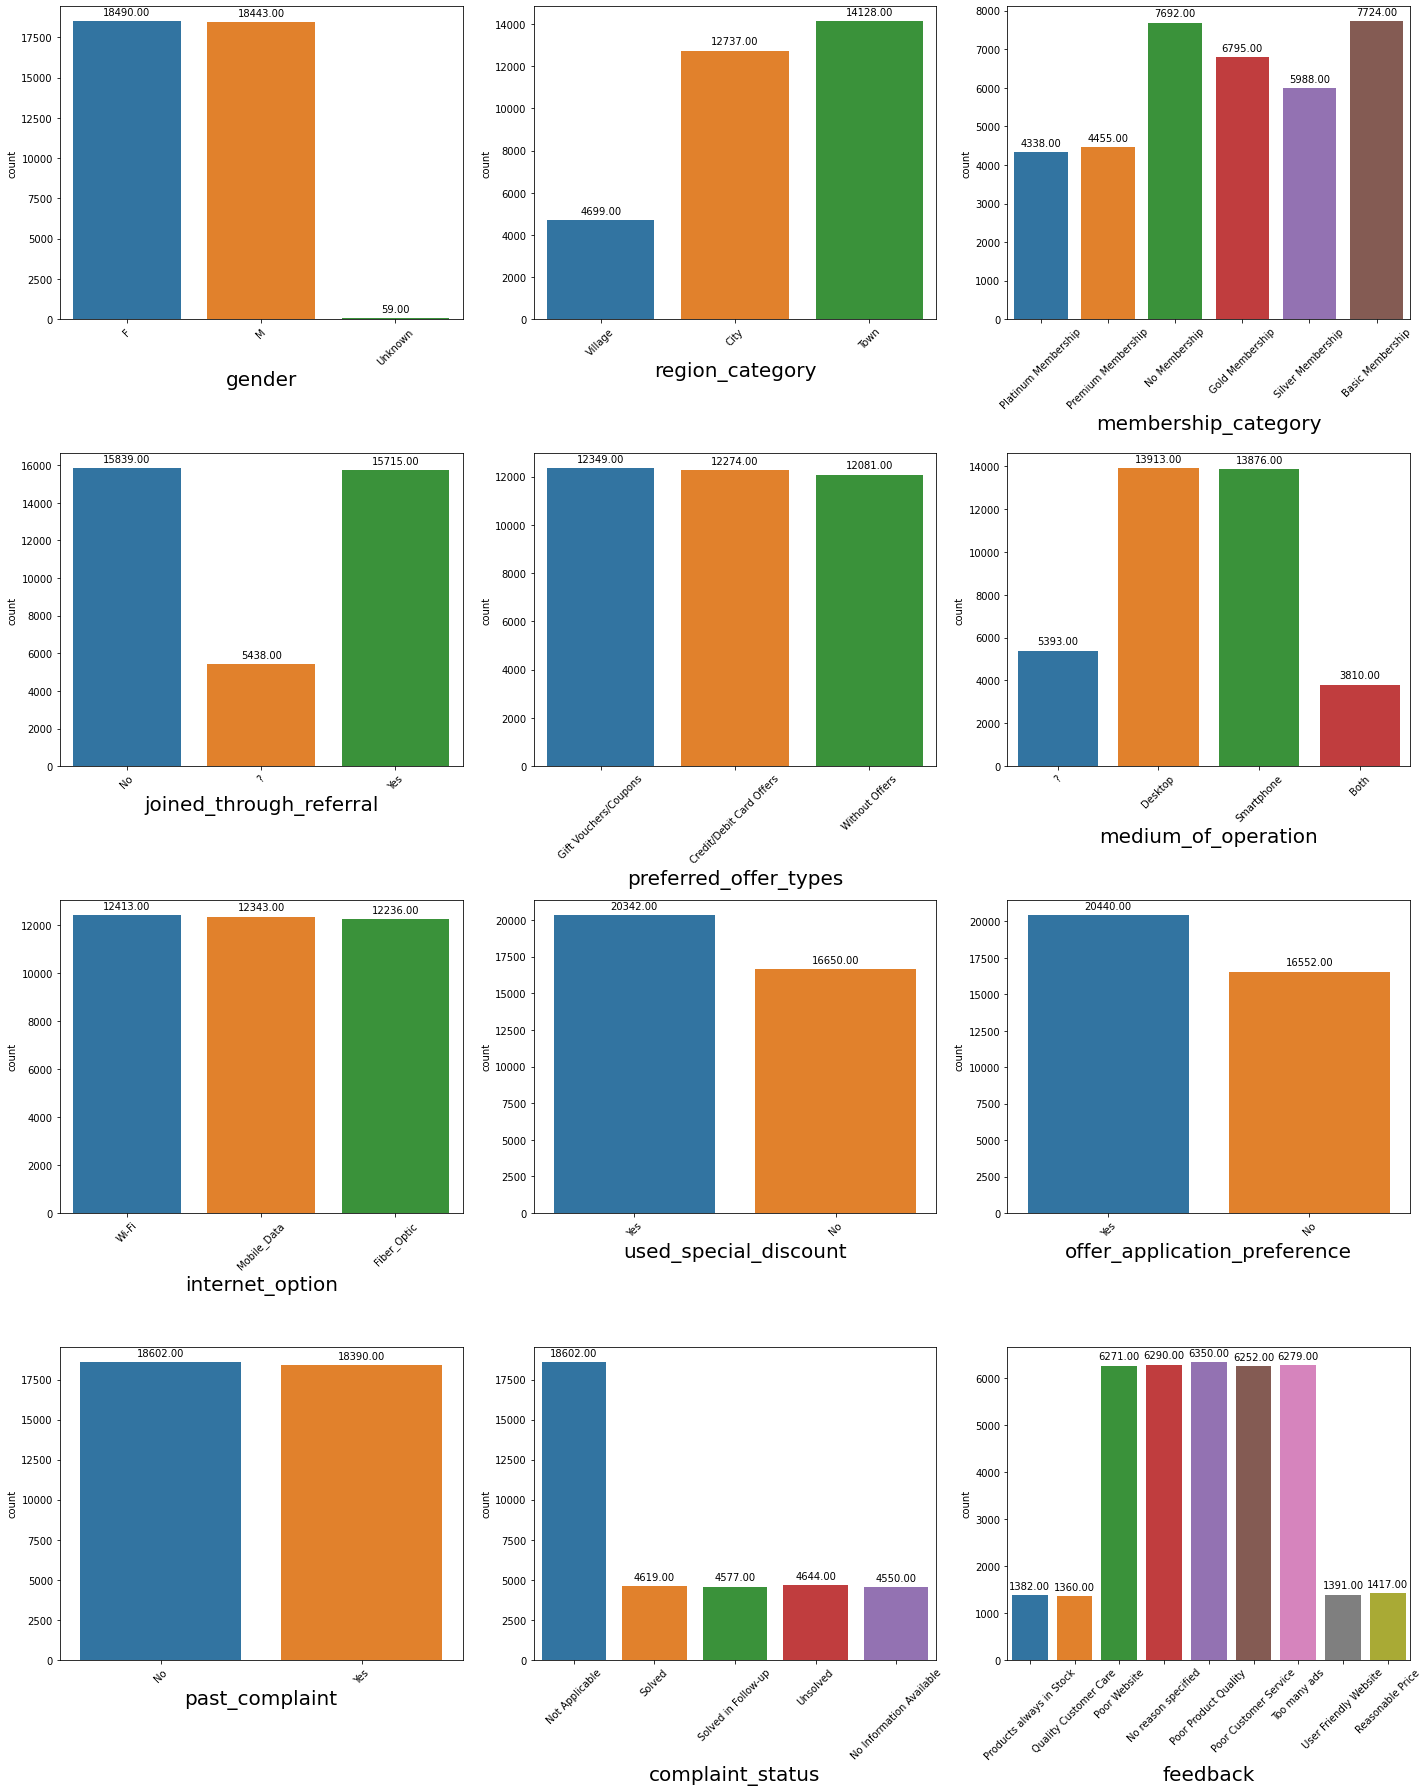

In [8]:
df_cat = df.drop(['customer_id','Name','referral_id','last_visit_time','avg_frequency_login_days','security_no','joining_date'], axis=1).select_dtypes(include='object')
fig,ax= plt.subplots(nrows=4,ncols=3,figsize=(20, 25)) 
for variable, subplot in zip(df_cat.columns,ax.flatten()):
    z = sns.countplot(x = df_cat[variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 20)
    z.set_xticklabels(z.get_xticklabels(),rotation=45)
    for p in z.patches:
      z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

In [5]:
missing_values = pd.DataFrame({
    'missing_values':df.isnull().sum(),
    'percentage':df.isnull().sum()*100/df.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
region_category,5428,14.673443
points_in_wallet,3443,9.307418
preferred_offer_types,288,0.778547
customer_id,0,0.000000
days_since_last_login,0,0.000000
feedback,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000
offer_application_preference,0,0.000000
used_special_discount,0,0.000000


In [3]:
df['joined_through_referral'] = df['joined_through_referral'].replace('?',np.NaN)
df['medium_of_operation'] = df['medium_of_operation'].replace('?',np.NaN)
df['gender'] = df['gender'].replace('Unknown',np.NaN)
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', np.NaN)
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

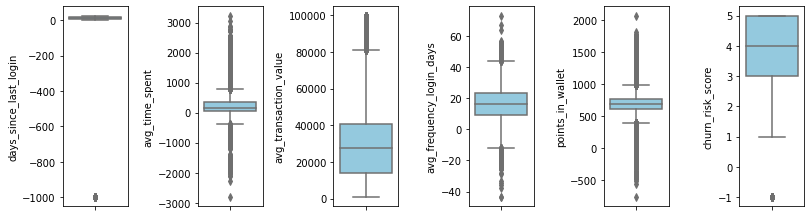

In [49]:
nums=df.select_dtypes(include=[np.number]).columns 
plt.figure(figsize=(20,12))
for i in range(1, len(nums)) :
  plt.subplot(4,11, i+2)
  sns.boxplot (y=df [nums[i]], color='skyblue', orient='v') 
plt.tight_layout ()

In [7]:
missing_values = pd.DataFrame({
    'missing_values':df.isnull().sum(),
    'percentage':df.isnull().sum()*100/df.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
joined_through_referral,5438,14.700476
region_category,5428,14.673443
medium_of_operation,5393,14.578828
avg_frequency_login_days,3522,9.520978
points_in_wallet,3443,9.307418
preferred_offer_types,288,0.778547
gender,59,0.159494
customer_id,0,0.000000
avg_time_spent,0,0.000000
feedback,0,0.000000


## Preprocessing

In [4]:
def preprocessing_data(df):
    #drop unimportant columns
    df = df.drop(['customer_id','Name','security_no','referral_id','last_visit_time','joining_date'], axis = 1) 
    
    # use mode to fill missing categorical data
    missing_cat = df[['gender','preferred_offer_types','region_category','joined_through_referral','medium_of_operation']]
    for i,col in enumerate(missing_cat):
        df[col].fillna(df[col].mode()[0], inplace=True)
        
    # replace negative value by positive median values
    df.loc[df['days_since_last_login'] < 0, 'days_since_last_login'] = df['days_since_last_login'].loc[df['days_since_last_login'] > 0].median()
    df.loc[df['avg_time_spent'] < 0, 'avg_time_spent'] = df['avg_time_spent'].loc[df['avg_time_spent'] > 0].median()
    df.loc[df['points_in_wallet'] < 0, 'points_in_wallet'] = df['points_in_wallet'].loc[df['points_in_wallet'] > 0].median() 
    df.loc[df['churn_risk_score'] == -1, 'churn_risk_score'] = 1
    
    nume_missing_col = df[['avg_frequency_login_days','points_in_wallet']]
    # fill missing with KNNImputer
    imputer = KNNImputer(n_neighbors=3)
    imputed_value=imputer.fit_transform(nume_missing_col)
    d1 = pd.DataFrame({
    'avg_frequency_login_days':imputed_value.T[0],
    'points_in_wallet':imputed_value.T[1],
    })
    df.drop(['avg_frequency_login_days','points_in_wallet'], axis=1, inplace=True)
    df = pd.concat([df, d1], axis=1)
    outliers_columns = ['avg_time_spent', 'points_in_wallet', 'avg_transaction_value', 'avg_frequency_login_days']
    
    #remove outliers
    for column in outliers_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [5]:
df = preprocessing_data(df.copy())

In [6]:
missing_values = pd.DataFrame({
    'missing_values':df.isnull().sum(),
    'percentage':df.isnull().sum()*100/df.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
age,0,0.0
avg_transaction_value,0,0.0
avg_frequency_login_days,0,0.0
churn_risk_score,0,0.0
feedback,0,0.0
complaint_status,0,0.0
past_complaint,0,0.0
offer_application_preference,0,0.0
used_special_discount,0,0.0
avg_time_spent,0,0.0


## Feature Engineering

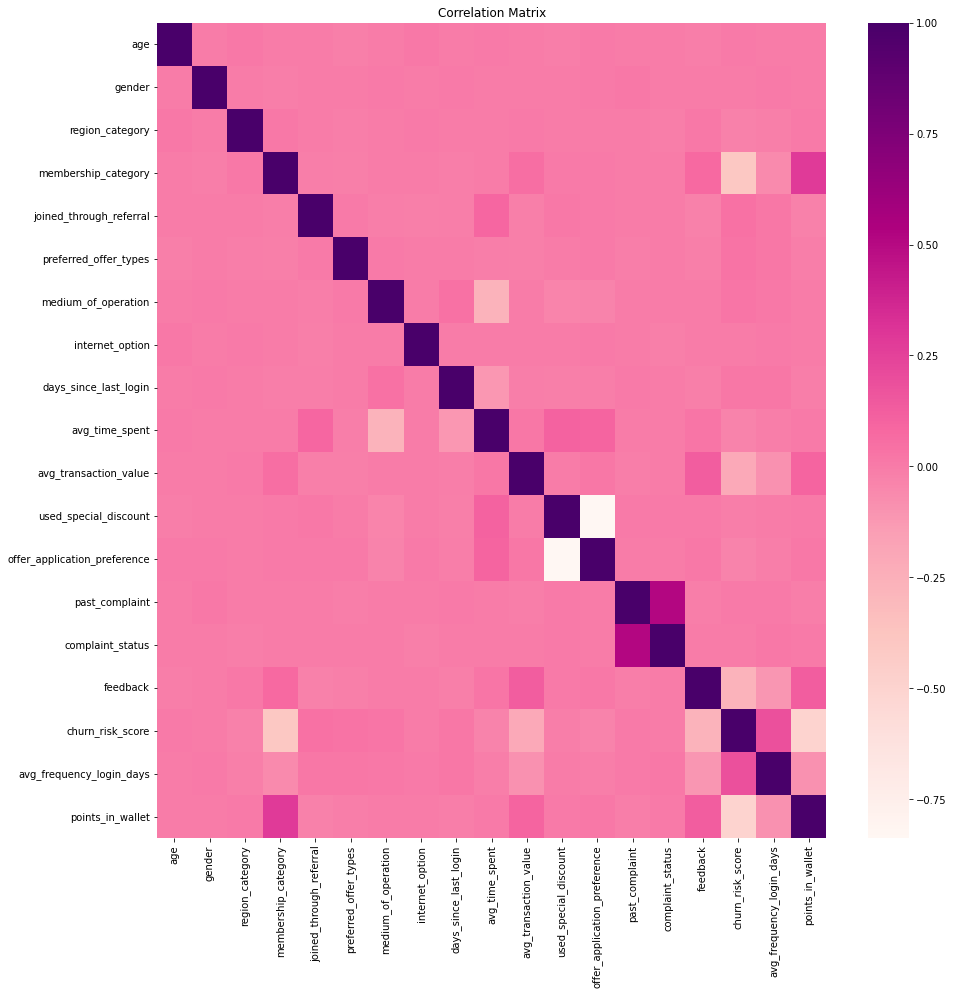

In [6]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    df['gender'].replace({'F':1,'M':0},inplace=True)
    df['joined_through_referral'].replace({'Yes':1,'No':0},inplace=True)
    df['past_complaint'].replace({'Yes':1,'No':0},inplace=True)
    df['offer_application_preference'].replace({'Yes':1,'No':0},inplace=True)
    df['used_special_discount'].replace({'Yes':1,'No':0},inplace=True)
    ordinal_col = df.select_dtypes(include = [np.object_]).columns
    label = LabelEncoder()
    for column in ordinal_col:
        df[column] = label.fit_transform(df[column])
    return df

df = apply_feature_engineering(df)
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='RdPu')
plt.title('Correlation Matrix')
plt.show()

In [18]:
df

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,avg_frequency_login_days,points_in_wallet
0,18,1,2,3,0,1,1,2,17,300.63,53005.25,1,1,0,1,4,2,17.000000,781.750000
1,32,1,0,4,0,1,1,1,16,306.34,12838.38,1,0,1,2,5,1,10.000000,686.293333
2,44,1,1,2,1,1,1,2,14,516.16,21027.00,0,1,1,3,3,5,22.000000,500.690000
3,37,0,0,2,1,1,1,1,11,53.27,25239.56,0,1,1,4,3,5,6.000000,567.660000
4,31,1,0,2,0,0,2,1,20,113.13,24483.66,0,1,1,2,3,5,16.000000,663.060000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36986,27,0,1,3,1,0,1,1,13,135.83,8225.68,1,0,0,1,0,3,16.000000,748.570000
36987,46,1,1,0,0,0,1,2,2,174.18,27277.68,0,1,1,0,0,4,6.000000,639.510000
36988,29,1,1,0,0,2,2,2,13,174.18,11069.71,1,0,0,1,1,5,28.000000,527.990000
36989,23,1,1,0,1,1,1,2,12,154.94,38127.56,0,1,1,4,3,4,15.666667,680.470000


In [7]:
def prepare_X_y(df):
    X = df.drop('churn_risk_score', axis = 1).values
    y = df['churn_risk_score'].values
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [8]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 123
TRAIN_SIZE = 0.7
X_train, X_test ,y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19644, 18)
(19644,)
(8419, 18)
(8419,)


In [46]:
X_train

,age,gender,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,used_special_discount,offer_application_preference,past_complaint,avg_frequency_login_days,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
7170,33,1,0,13,52.990000,33762.83,0,1,0,10.0,...,0,0,0,0,0,0,0,0,0,0
28276,41,1,0,10,65.460000,46756.57,0,1,0,29.0,...,0,0,1,0,0,0,0,0,0,0
7940,22,0,0,7,159.450000,85218.60,1,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
14615,41,1,1,11,33.850000,33919.07,1,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
15302,58,1,0,17,133.810000,22089.46,1,0,1,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,47,0,0,5,181.430000,23160.40,0,1,0,19.0,...,0,0,0,0,0,0,0,0,0,0
15377,37,1,0,10,31.840000,5968.15,1,0,0,14.0,...,0,0,0,0,0,0,0,0,0,0
17730,38,0,0,16,1266.736075,41955.68,1,0,0,6.0,...,0,0,0,0,0,0,0,0,0,0
28030,13,0,0,2,882.050000,32201.63,1,1,1,20.0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
pip install -U threadpoolctl

  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


## Sampling data

In [9]:
smote = SMOTE()
X_train_sample, y_train_sample = smote.fit_resample(X_train, y_train.ravel())
# checking the sizes of the sample data
print("Size of x-sample :", X_train_sample.shape)
print("Size of y-sample :", y_train_sample.shape)
     

Size of x-sample : (28675, 18)
Size of y-sample : (28675,)


## Build SK-learn model

## Decision Tree

In [30]:
clf = DecisionTreeClassifier()
#scaler = St
pipe = Pipeline(steps=[("scaler", StandardScaler()),("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

search = GridSearchCV(pipe, param_grid, cv=3, scoring="recall_macro", n_jobs=2, error_score= "raise")
search.fit(X_train_sample, y_train_sample)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.749):
{'tree__criterion': 'entropy'}


In [31]:
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

              precision    recall  f1-score   support

           1       0.45      0.49      0.47       754
           2       0.71      0.72      0.72       498
           3       0.89      0.87      0.88      2462
           4       0.64      0.64      0.64      2380
           5       0.71      0.71      0.71      2325

    accuracy                           0.72      8419
   macro avg       0.68      0.68      0.68      8419
weighted avg       0.72      0.72      0.72      8419



## Random Forest

In [33]:
random_forest = RandomForestClassifier(random_state=RANDOM_STATE)
#scaler = St
pipe = Pipeline(steps=[("scaler", StandardScaler()),("tree", random_forest)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "tree__n_estimators": [100, 200, 300],
    "tree__max_depth": [6,8,12,14],
    "tree__max_features": ("sqrt","auto"),
    }

search = GridSearchCV(pipe, param_grid, scoring="recall_macro", cv = 3, n_jobs=2)
search.fit(X_train_sample, y_train_sample)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.787):
{'tree__max_depth': 14, 'tree__max_features': 'sqrt', 'tree__n_estimators': 200}


In [34]:
predicted_label = search.predict(X_test)
print(classification_report(y_test, predicted_label))

              precision    recall  f1-score   support

           1       0.79      0.49      0.60       754
           2       0.74      0.80      0.77       498
           3       0.88      0.93      0.90      2462
           4       0.69      0.64      0.66      2380
           5       0.71      0.79      0.75      2325

    accuracy                           0.76      8419
   macro avg       0.76      0.73      0.74      8419
weighted avg       0.76      0.76      0.76      8419



## XGBoost

In [35]:
le = LabelEncoder()
y_train_temp = le.fit_transform(y_train_sample)
y_test_temp = le.fit_transform(y_test)

In [36]:
y_train_temp

array([2, 4, 3, ..., 4, 4, 4], dtype=int64)

In [37]:
y_train_sample

array([3, 5, 4, ..., 5, 5, 5], dtype=int64)

In [39]:
xgboost = XGBClassifier()
#scaler = St
pipe = Pipeline(steps=[("scaler", StandardScaler()),("xgboost", xgboost)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "xgboost__n_estimators": [100, 300],
    "xgboost__learning_rate": [0.05, 0.1],
    }

search_xg = GridSearchCV(pipe, param_grid, scoring="recall_macro", cv = 3, n_jobs=2)
search_xg.fit(X_train_sample, y_train_temp)
print("Best parameter (CV score=%0.3f):" % search_xg.best_score_)
print(search_xg.best_params_)

Best parameter (CV score=0.802):
{'xgboost__learning_rate': 0.1, 'xgboost__n_estimators': 300}


In [40]:
predicted_label = search_xg.predict(X_test)
print(classification_report(y_test_temp, predicted_label))

              precision    recall  f1-score   support

           0       0.74      0.51      0.61       754
           1       0.75      0.73      0.74       498
           2       0.90      0.92      0.91      2462
           3       0.69      0.63      0.66      2380
           4       0.71      0.83      0.76      2325

    accuracy                           0.77      8419
   macro avg       0.76      0.73      0.74      8419
weighted avg       0.77      0.77      0.76      8419



## Catboost

In [28]:
cat = CatBoostClassifier()
#scaler = St
pipe = Pipeline(steps=[("scaler", StandardScaler()),("catboost", cat)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
param_grid = {
    "catboost__n_estimators": [100, 200, 300],
    "catboost__learning_rate": [0.001, 0.01],
    "catboost__max_depth": [3,4,5]
    }

search_cat = GridSearchCV(pipe, param_grid, scoring="recall_macro", cv = 3, n_jobs=2)
search_cat.fit(X_train_sample, y_train_temp)
print("Best parameter (CV score=%0.3f):" % search_cat.best_score_)
print(search.best_params_)

0:	learn: 1.4664604	total: 30.3ms	remaining: 9.07s
1:	learn: 1.3622003	total: 57.1ms	remaining: 8.5s
2:	learn: 1.2784131	total: 87.7ms	remaining: 8.68s
3:	learn: 1.2099421	total: 122ms	remaining: 9.06s
4:	learn: 1.1437866	total: 157ms	remaining: 9.25s
5:	learn: 1.0924036	total: 195ms	remaining: 9.55s
6:	learn: 1.0466192	total: 231ms	remaining: 9.68s
7:	learn: 1.0121543	total: 268ms	remaining: 9.78s
8:	learn: 0.9737030	total: 299ms	remaining: 9.65s
9:	learn: 0.9462624	total: 329ms	remaining: 9.55s
10:	learn: 0.9146796	total: 364ms	remaining: 9.58s
11:	learn: 0.8926168	total: 397ms	remaining: 9.53s
12:	learn: 0.8715447	total: 433ms	remaining: 9.57s
13:	learn: 0.8491236	total: 467ms	remaining: 9.53s
14:	learn: 0.8314895	total: 501ms	remaining: 9.51s
15:	learn: 0.8094175	total: 533ms	remaining: 9.46s
16:	learn: 0.7918500	total: 569ms	remaining: 9.47s
17:	learn: 0.7779814	total: 604ms	remaining: 9.46s
18:	learn: 0.7629696	total: 643ms	remaining: 9.51s
19:	learn: 0.7503685	total: 680ms	remai

162:	learn: 0.4760265	total: 4.78s	remaining: 4.02s
163:	learn: 0.4755210	total: 4.81s	remaining: 3.99s
164:	learn: 0.4752441	total: 4.83s	remaining: 3.95s
165:	learn: 0.4750497	total: 4.86s	remaining: 3.92s
166:	learn: 0.4746670	total: 4.89s	remaining: 3.89s
167:	learn: 0.4742199	total: 4.92s	remaining: 3.86s
168:	learn: 0.4737139	total: 4.94s	remaining: 3.83s
169:	learn: 0.4733206	total: 4.97s	remaining: 3.8s
170:	learn: 0.4729952	total: 5s	remaining: 3.77s
171:	learn: 0.4725594	total: 5.02s	remaining: 3.73s
172:	learn: 0.4721771	total: 5.05s	remaining: 3.7s
173:	learn: 0.4717811	total: 5.07s	remaining: 3.67s
174:	learn: 0.4714980	total: 5.1s	remaining: 3.64s
175:	learn: 0.4711494	total: 5.13s	remaining: 3.61s
176:	learn: 0.4708045	total: 5.15s	remaining: 3.58s
177:	learn: 0.4704370	total: 5.18s	remaining: 3.55s
178:	learn: 0.4695691	total: 5.21s	remaining: 3.52s
179:	learn: 0.4692601	total: 5.23s	remaining: 3.49s
180:	learn: 0.4689232	total: 5.26s	remaining: 3.46s
181:	learn: 0.4684

In [29]:
predicted_label = search_cat.predict(X_test)
print(classification_report(y_test_temp, predicted_label))

              precision    recall  f1-score   support

           0       0.76      0.50      0.60       754
           1       0.75      0.77      0.76       498
           2       0.89      0.93      0.91      2462
           3       0.75      0.57      0.65      2380
           4       0.69      0.90      0.78      2325

    accuracy                           0.77      8419
   macro avg       0.77      0.73      0.74      8419
weighted avg       0.78      0.77      0.76      8419



In [7]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. " \
           "Có thể thấy được giữa RandomForest, XGBoost và Catboost các metric không có sự sai biệt gì nhiều. Mặc dù e đã thử chạy nhiều param_grid hơn nhưng máy em bị tràn Ram và ngốn hết CPPU máy tính nên em phải giảm lại nhiều, nhưng nhìn chung giữa 3 thuật toán trên cho kết quả khá giống nhau. Em sẽ chọn main model là Catboost và main metric là recall để đánh giá hiệu quả model, với param cho model là learning_rate = 0.1, n_estimator = 300 và max_depth = 5"

In [8]:
print(get_conclusion())

7. Có thể thấy được giữa RandomForest, XGBoost và Catboost các metric không có sự sai biệt gì nhiều. Mặc dù e đã thử chạy nhiều param_grid hơn nhưng máy em bị tràn Ram và ngốn hết CPPU máy tính nên em phải giảm lại nhiều, nhưng nhìn chung giữa 3 thuật toán trên cho kết quả khá giống nhau. Em sẽ chọn main model là Catboost và main metric là recall để đánh giá hiệu quả model, với param cho model là learning_rate = 0.1, n_estimator = 300 và max_depth = 5
